# Import Libraries & Datasets

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


# Which hour has the highest frequency of crimes?

In [3]:
# Extract TIME OCC
crimes['Hour OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Peak crime hour
peak_crime_hour = crimes['Hour OCC'].value_counts().idxmax()

print(peak_crime_hour)

12


# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [4]:
# Peak night crime location (10pm to 3:59am)
night_crimes = crimes[(crimes['Hour OCC'] >= 22) | (crimes['Hour OCC'] < 4)]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

print(peak_night_crime_location)

Central


# Identify the number of crimes committed against victims of different age groups.

In [5]:
# Victim ages grouped
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)
victim_ages = crimes['Age Group'].value_counts().reindex(age_labels, fill_value=0)

print(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


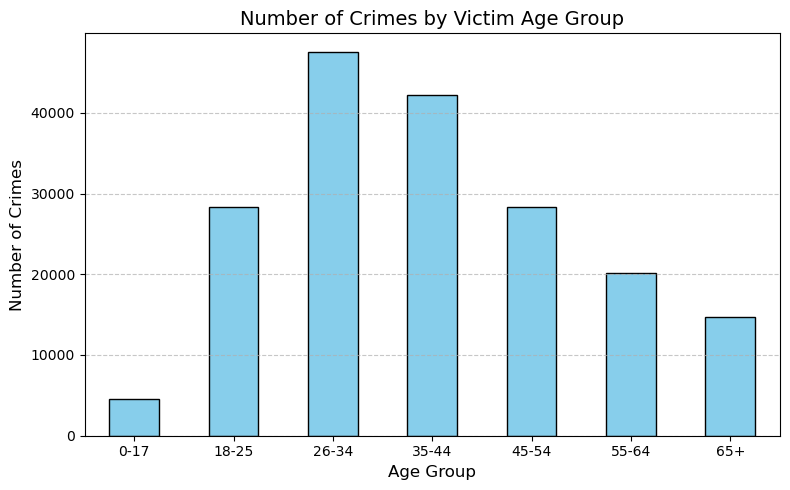

In [6]:
# Visualize the number of crimes committed against victims of different age groups
plt.figure(figsize=(8, 5))
victim_ages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Crimes by Victim Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()